# Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Salaries.csv', sep=',')
df.head(5)

<ipython-input-1-dd90603b5970>:4: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Salaries.csv', sep=',')


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [ ]:
df.shape

(148654, 13)

In [ ]:
df.count()

,0
Id,148654
EmployeeName,148654
JobTitle,148654
BasePay,148049
OvertimePay,148654
OtherPay,148654
Benefits,112495
TotalPay,148654
TotalPayBenefits,148654
Year,148654


In [ ]:
df.isna().sum()

,0
Id,0
EmployeeName,0
JobTitle,0
BasePay,605
OvertimePay,0
OtherPay,0
Benefits,36159
TotalPay,0
TotalPayBenefits,0
Year,0


# Questions

## 1. Average BasePay

In [ ]:
df['BasePay']

,BasePay
0,167411.18
1,155966.02
2,212739.13
3,77916.0
4,134401.6
...,...
148649,0.00
148650,Not Provided
148651,Not Provided
148652,Not Provided


In [ ]:
df = df[~(df['BasePay']=='Not Provided')]

In [ ]:
df['BasePay'].dtype

dtype('O')

In [ ]:
df['BasePay'] = df['BasePay'].astype(float)
df['BasePay'].mean()

np.float64(66325.4488404877)

## 2. Max OvertimePay

In [ ]:
max = df['OvertimePay'].astype(float).max()
df[df['OvertimePay'] == max]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


## 3. Who is JOSEPH DRISCOLL?

In [ ]:
df[df['EmployeeName'] == 'JOSEPH DRISCOLL']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
24,25,JOSEPH DRISCOLL,"CAPTAIN, FIRE SUPPRESSION",140546.86,97868.77,31909.28,NaN,270324.91,270324.91,2011,NaN,San Francisco,NaN


In [ ]:
df[df['EmployeeName'] == 'JOSEPH DRISCOLL']['TotalPay']

,TotalPay
24,270324.91


## 4. Who has the max BasePay?

In [ ]:
max = df['BasePay'].max()
df[df['BasePay'] == max]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
72925,72926,Gregory P Suhr,Chief of Police,319275.01,0.0,20007.06,86533.21,339282.07,425815.28,2013,NaN,San Francisco,NaN


## 5. Who has the min BasePay?

In [ ]:
min = df['BasePay'].min()
df[df['BasePay'] == min]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
72832,72833,Irwin Sidharta,Junior Clerk,-166.01,249.02,0.0,6.56,83.01,89.57,2012,NaN,San Francisco,NaN


## 6. Average BasePay per year

In [ ]:
avgYear = pd.DataFrame(df.groupby('Year')['BasePay'].mean())
avgYear

,BasePay
Year,
2011,63595.956517
2012,65436.406857
2013,69630.030216
2014,66564.421924


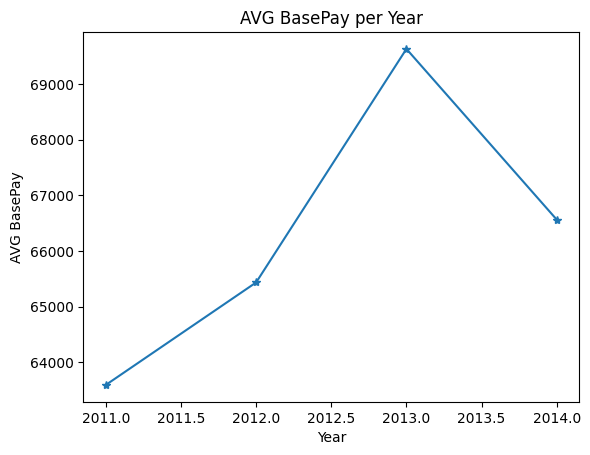

In [ ]:
plt.plot(avgYear.index, avgYear['BasePay'], '-*')
plt.xlabel('Year')
plt.ylabel('AVG BasePay')
plt.title('AVG BasePay per Year')
plt.show()

## 7. How many JobTitle are there?

In [ ]:
df['JobTitle'].unique()

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ...,
       'Forensic Toxicologist Supervis', 'Conversion', 'Cashier 3'],
      dtype=object)

In [ ]:
df['JobTitle'].nunique()

2158

## 8. Top 5 common jobs

In [ ]:
groupJobs = df.groupby('JobTitle')['Id'].count()
group5Jobs = groupJobs.sort_values(ascending=False).head(5)
# or df['JobTitle'].value_counts().iloc[:5]

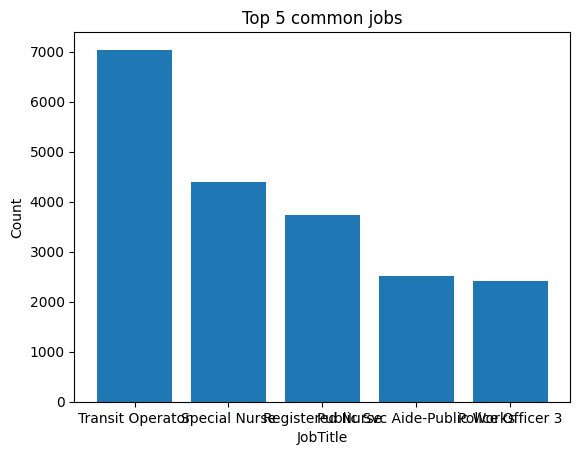

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.bar(group5Jobs.index, group5Jobs.values)
plt.xlabel('JobTitle')
plt.ylabel('Count')
plt.title('Top 5 common jobs')
plt.show()

plt.tight_layout()

## 9. How many employees contains 'chief'?

In [ ]:
def chief(title):
  if 'chief' in title.lower():
    return True
  else:
    return False

In [ ]:
Status = df['JobTitle'].apply(chief)
Status.value_counts()

,count
JobTitle,
False,148023
True,627


In [ ]:
len(df[Status]['EmployeeName'].unique())

517